<a href="https://colab.research.google.com/github/johnatanDM/PolioBrasil/blob/main/Notebooks/Projeto_PolioBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

## Poliomielite - Paralisia infantil


A **Poliomielite**, mais conhecida como Paralisia Infantil, é uma doença **infecciosa viral aguda transmitida de pessoa a pessoa**. 

A maioria das pessoas não desenvolvem qualquer sintoma da doença, porém os indivíduos afetados podem exibir uma variedade de sintomas se o vírus atingir a corrente sanguínea. E cerca de 1% dos casos, o vírus alcança o sistema nervoso central, preferencialmente infectando e destruindo neurônios motores, levando à **fraqueza muscular e à paralisia flácida aguda**.

Por volta de 1910, grande parte do mundo experimentou um aumento dramático dos casos de poliomielite e as epidemias tornaram-se eventos comuns, principalmente nas cidades durante os meses de verão. Essas epidemias — que deixaram milhares de crianças e adultos paralíticos — incentivaram a "Grande Corrida" em busca do desenvolvimento de uma vacina. 

<img src="https://github.com/johnatanDM/PolioBrasil/blob/main/Arquivos/polio.jpg?raw=true?raw=true" alt="O poliovírus destrói as células nervosas da medula espinhal, leva à perda de massa muscular e à paralisia" width= "750"/>


## A Vacina

A vacina,desenvolvida na década de 1950, contra a poliomielite, também conhecida como VIP ou VOP, protege a criança de 3 tipos diferentes do vírus que causam esta doença.

A recomendação da Organização Mundial de Saúde e da Sociedade Brasileira de Imunização é a de que sejam dadas 3 doses da vacina VIP, vacina dada por meio de injeção, até os 6 meses e que sejam aplicadas outras 2 doses da vacina até os 5 anos, neste caso podendo ser tanto por via oral, que é a vacina VOP, ou injetável, mas sempre a forma mais indicada é a VIP.

<img src="https://github.com/johnatanDM/PolioBrasil/blob/5f415de17d59785fa99b329f01977310ac59b2ca/Arquivos/zegotinha.jpg?raw=true" alt="Zé Gotinha e Maria Gotinha" width= "250"/>

## Erradicação Global

Os esforços pela vacinação, apoiados pela **GAVI Alliance, Rotary International, Organização Mundial da Saúde (OMS) e UNICEF**, devem resultar na erradicação global desta doença.

Em agosto de 2020 a OMS anunciou que **apenas dois países ainda tinham casos de transmissão** e que "o mundo está mais perto de alcançar a erradicação global da pólio".

## Importância da Vacinação



A doença já foi erradicada das Américas, mas ainda existe o risco de que uma pessoa em viagem de turismo ou negócios pode levar o vírus para outros países.

<img src="https://github.com/johnatanDM/PolioBrasil/blob/main/Arquivos/vacina.jpg?raw=true?raw=true" alt="Menina tomando a vacina" width= "500"/>


# Sobre o projeto



Nesse projeto vamos analisar como tem sido a aplicação das doses da vacina contra a Poliomielite no Brasil pelo SUS.

Os dados foram obtidos usando a ferramente de dados abertos do SUS - TabNet.

<img src="https://github.com/johnatanDM/PolioBrasil/blob/a7bd750f16b66c2a7ef263ab119bb5929c54e1a3/Arquivos/sus-logo.png?raw=true" alt="SUS" width= "250"/>



# Importe das Bibliotecas, Download e tratamentos dos dados

Importando as bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [2]:
!pip freeze > requirements.txt

In [3]:
# def coluna_ano_para_timestamp(ano):
#   return date(ano,1,1)

def baixa_dados(url, skiprows, skipfooter):
  dados = pd.read_csv(url, 
                    delimiter=';', 
                    encoding = "ISO-8859-1",
                    skiprows=skiprows,
                    skipfooter=skipfooter,
                    thousands=".",
                    engine='python')

  #Criando uma coluna Região
  regioes = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro-Oeste'}
  estados = dados['Unidade da Federação']
  dados["Regiao"] = list(map(lambda estado: regioes[estado[0]] , estados))

  #Criando a coluna uf e transformando em index
  dados['uf'] = dados['Unidade da Federação'].str[3:]
  dados.drop(columns=['Unidade da Federação'], inplace=True)
  dados.set_index('uf', inplace=True)

  #retirando anos com dados incompletos
  dados.replace('-',np.nan, inplace=True)
  dados.dropna(axis=1, inplace=True)

  return dados

baixando dados

In [4]:
'''Imunizações - Cobertura - Brasil
Doses Cáculos CV por Unidade da Federação e Ano
Imuno: 074 Poliomielite, 100 Poliomielite 4 anos, 093 Poliomielite(1º ref)
Período:1994-2019
'''
url = 'https://github.com/johnatanDM/PolioBrasil/raw/main/Dados/A035525189_28_143_208.csv'
dados_imunizacoes = baixa_dados(url, 4, 20)
dados_imunizacoes.sample(10)

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total,Regiao
uf,,,,,,,,,,,,,,,,,,,,,,,,,
Alagoas,33319,40546,57632,64177,57381,66037,68233,62209,62678,59742,54180,52764,58830,55727,50258,50038,97395,93801,91984,80571,87310,86112,55012,1552347,Nordeste
Tocantins,26282,29039,29649,30017,31687,29059,28404,27376,28042,28344,27268,25666,26851,24213,24813,23101,45114,41647,41966,43396,41761,39460,27021,737915,Norte
Maranhão,80400,84862,90150,108016,135696,137927,143536,137068,147343,145927,150977,138573,138574,131755,127189,120534,244011,202117,203100,147666,160736,152001,99816,3415582,Nordeste
Goiás,64129,87744,96888,101467,93959,93205,95869,97861,95199,96750,95673,91187,91999,87946,93671,88325,183265,172717,165013,156977,161637,148954,98880,2762035,Centro-Oeste
Rondônia,27372,31703,29458,30687,32260,30817,30004,30011,30979,30436,27794,28390,29203,26389,27986,27559,54231,53243,54809,49315,52458,46871,28509,887994,Norte
Mato Grosso do Sul,33022,39241,41443,45601,44591,45659,42024,41345,41637,41335,40485,39933,42716,40118,38467,41181,93603,102505,93178,79822,77555,83054,49571,1269632,Centro-Oeste
Amapá,10015,9218,10855,12979,22652,13382,14533,14525,14090,13882,14255,14666,18028,12974,12092,13248,27288,22889,25962,12493,15330,16658,12772,368860,Norte
Espírito Santo,53174,66015,82737,63352,62695,63269,63836,59736,58792,57852,55593,54226,55226,53039,55711,54000,102380,101910,102100,94797,89663,89317,58141,1732969,Sudeste
Roraima,5831,7537,7421,13067,8215,8389,8780,8867,9727,8723,9103,9045,9989,9318,9203,8554,16232,18175,22843,19529,19958,18662,11388,284974,Norte


In [5]:
'''Nascidos vivos - Brasil
Nascim p/resid.mãe por Unidade da Federação e Ano do nascimento
Período:1994-2019
'''
url = 'https://github.com/johnatanDM/PolioBrasil/raw/main/Dados/A003819189_28_143_208.csv'
dados_nacidos_vivos = baixa_dados(url,3,13)
dados_nacidos_vivos.drop(columns=['1994', '1995', '1996'], inplace=True)
dados_nacidos_vivos.sample(10)

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total,Regiao
uf,,,,,,,,,,,,,,,,,,,,,,,,,
Minas Gerais,192014,295364,307751,300958,298538,284558,284904,277691,277468,266143,259505,260916,252676,255126,259863,260544,258635,267130,268305,253520,260959,263640,256892,6523983,Sudeste
Paraná,192757,185378,186675,179462,167270,165125,157333,159636,160324,153598,147554,151092,149217,152051,152902,153945,155758,159915,160947,155066,157701,156201,153469,4307173,Sul
Pará,109095,116551,127417,126340,134742,136000,144812,142894,145540,150202,150147,151262,143140,140687,141974,137837,139416,143503,143657,137681,138684,141819,138341,3469286,Norte
Goiás,101336,99526,94017,94746,92979,93897,92081,91231,91556,87483,85159,87462,87485,87476,89742,93274,94822,99798,100672,95563,97520,98872,96112,2416668,Centro-Oeste
Piauí,32422,46753,49436,58615,58588,56332,55105,54747,56866,55342,53214,52664,50996,49424,50144,47962,46419,47941,49253,46986,48551,49490,47933,1274827,Nordeste
Acre,14778,13291,14939,15228,14899,15841,15986,16584,17482,16448,16183,17994,16892,16495,17817,16700,17075,17139,16980,15773,16358,16543,16280,412703,Norte
São Paulo,701947,693413,714428,687779,632483,623302,610555,618080,618880,603368,595408,601795,598473,601352,610222,616608,610896,625687,634026,601437,611803,606146,583191,16481239,Sudeste
Mato Grosso do Sul,43420,41917,41859,40490,40070,39933,39248,41567,41424,39515,38621,41229,40274,40132,42152,42252,42296,44058,44142,42432,44747,44275,43695,1093870,Centro-Oeste
Roraima,8101,8223,9669,9744,9600,8990,10160,9742,9694,9592,9582,10103,9673,9738,9945,10601,10814,11120,11412,11376,11737,13344,14620,256280,Norte


#Analise dos dados a nível nacional

In [6]:
anos = list(dados_imunizacoes.columns[:-2])
dados_imunizacoes_m = dados_imunizacoes.reset_index().melt(id_vars=['uf'], value_vars=anos)
dados_imunizacoes_m.columns = ['uf', 'ano', 'doses']
dados_imunizacoes_m.doses = dados_imunizacoes_m.doses / 1000

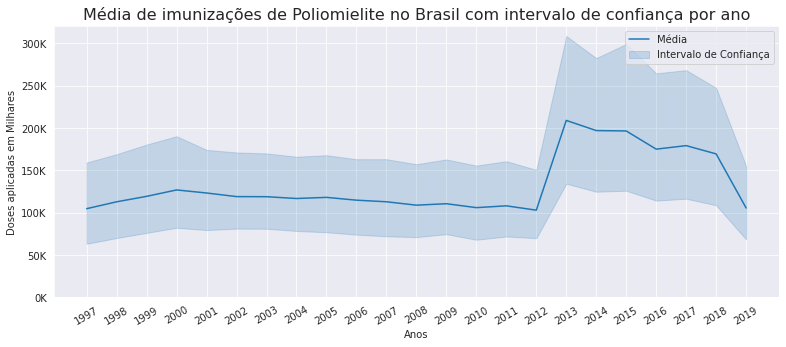

In [7]:
plt.figure(figsize=(13,5))
sns.set_style('darkgrid')
ax = sns.lineplot(data=dados_imunizacoes_m, x='ano', y='doses')
plt.ylim(0,)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}K"))
plt.title('Média de imunizações de Poliomielite no Brasil com intervalo de confiança por ano', fontsize=16)
ax.set_ylabel('Doses aplicadas em Milhares')
ax.set_xlabel('Anos')
plt.xticks(rotation=30)
plt.legend(['Média', 'Intervalo de Confiança'])
plt.show()

Pelo gráfico é possível ver que o número médio de aplicações da vacina contra a Poliomielite no Brasil sofreu uma grande alavancada entre 2012 e 2013. Porém nota-se uma tendência de queda nos últimos 7 anos.

Vamos analisar os estados do Nordeste.

#Analise dos dados do Nordeste

In [8]:
imunizacoes_nordeste = dados_imunizacoes.query("Regiao == 'Nordeste'")
anos = list(imunizacoes_nordeste.columns[:-2])
imunizacoes_nordeste_m = imunizacoes_nordeste.reset_index().melt(id_vars=['uf'], value_vars=anos)
imunizacoes_nordeste_m.columns = ['uf', 'ano', 'doses']
imunizacoes_nordeste_m.doses = imunizacoes_nordeste_m.doses / 1000

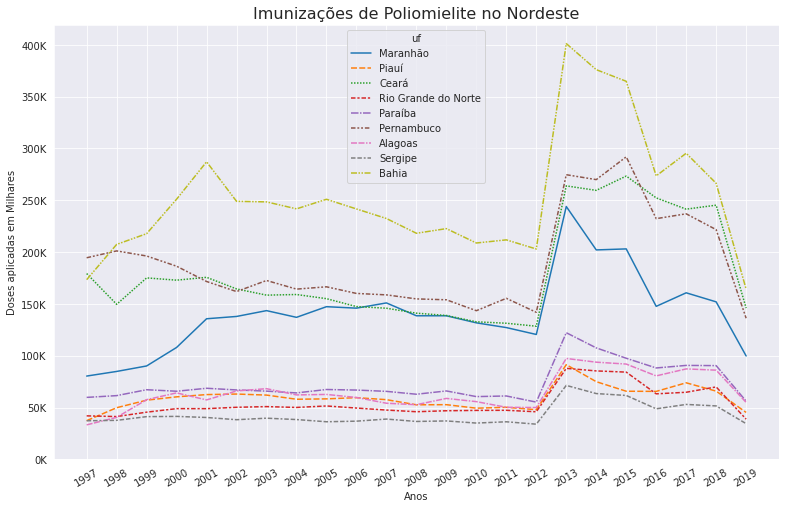

In [9]:
plt.figure(figsize=(13,8))
sns.set_style('darkgrid')
ax = sns.lineplot(data=imunizacoes_nordeste_m, x='ano', y='doses', hue='uf', style='uf')
plt.ylim(0,)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}K"))
plt.title('Imunizações de Poliomielite no Nordeste', fontsize=16)
ax.set_ylabel('Doses aplicadas em Milhares')
ax.set_xlabel('Anos')
plt.xticks(rotation=30)
plt.show()

A grande alta entre 2012 e 2013 pode ser percebida em todos os estados do Nordeste. Assim como a tendência de queda nos anos seguintes. Mantando um comportamento semelhante ao cenário nacional.

Vamos olhar mais de perto os dados do estado do Ceará e comparar com o número de Nascidos vivos registrados no estado.

#Análise dos dados do Ceará

In [10]:
# Dados de imunizações no Ceará
imunizacoes_ceara = dados_imunizacoes.loc['Ceará'].reset_index()
imunizacoes_ceara = imunizacoes_ceara[:-2]
imunizacoes_ceara.columns = ['ano', 'imunizacoes']
imunizacoes_ceara.ano.astype('category')
imunizacoes_ceara.imunizacoes = imunizacoes_ceara.imunizacoes.astype('int64') / 1000

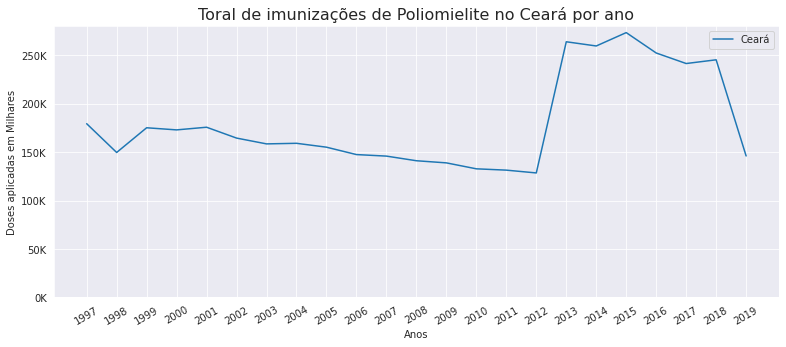

In [11]:
plt.figure(figsize=(13,5))
sns.set_style('darkgrid')
ax = sns.lineplot(data=imunizacoes_ceara, x = 'ano', y= 'imunizacoes')
plt.ylim(0,)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}K"))
plt.title('Toral de imunizações de Poliomielite no Ceará por ano', fontsize=16)
ax.set_ylabel('Doses aplicadas em Milhares')
ax.set_xlabel('Anos')
plt.xticks(rotation=30)
plt.legend(['Ceará'])
plt.show()

In [12]:
# Dados de nacidos vivos do Ceará
dados_nacidos_ceara = dados_nacidos_vivos.loc['Ceará'].reset_index()
dados_nacidos_ceara = dados_nacidos_ceara[:-2]
dados_nacidos_ceara.columns = ['ano', 'nacidos']
dados_nacidos_ceara.ano.astype('category')
dados_nacidos_ceara.nacidos = dados_nacidos_ceara.nacidos.astype('int64') / 1000

A vacina contra a Poliomielite deve ser tomada em 5 doses. Sendo as 3 primeiras logo no primeiro ano da criança e as outras duas (reforço) até os 4 ou 5 anos de idade.

Portanto para comparação com o número de nacidos vamos divir o número de doses aplicadas por 5 para chegar a uma aproximação de crianças imunizadas nos 5 primeiros anos de vida.

In [13]:
imunizacoes_ceara['imunizacoes'] = imunizacoes_ceara['imunizacoes'] / 3

In [14]:
dados_nacidos_ceara.set_index('ano', inplace=True)
imunizacoes_ceara.set_index('ano', inplace=True)

In [15]:
nacidos_imunizacoes_ceara = imunizacoes_ceara.join(dados_nacidos_ceara)
nacidos_imunizacoes_ceara_m = nacidos_imunizacoes_ceara.reset_index().melt(id_vars='ano',value_vars=nacidos_imunizacoes_ceara.columns)
nacidos_imunizacoes_ceara_m.columns = ['ano', 'chave', 'valor']
nacidos_imunizacoes_ceara_m.sample(10)

,ano,chave,valor
7,2004,imunizacoes,53.030333
3,2000,imunizacoes,57.645333
31,2005,nacidos,140.035000
1,1998,imunizacoes,49.875000
36,2010,nacidos,128.831000
28,2002,nacidos,143.242000
4,2001,imunizacoes,58.561000
10,2007,imunizacoes,48.621333
35,2009,nacidos,131.393000
8,2005,imunizacoes,51.693333


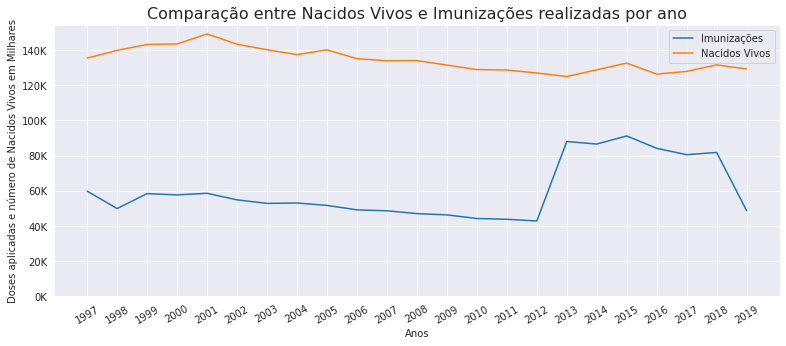

In [16]:
plt.figure(figsize=(13,5))
sns.set_style('darkgrid')
ax = sns.lineplot(data=nacidos_imunizacoes_ceara_m, x = 'ano', y= 'valor', hue='chave')
plt.ylim(0,)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}K"))
plt.title('Comparação entre Nacidos Vivos e Imunizações realizadas por ano', fontsize=16)
ax.set_ylabel('Doses aplicadas e número de Nacidos Vivos em Milhares')
ax.set_xlabel('Anos')
plt.xticks(rotation=30)
plt.legend(['Imunizações','Nacidos Vivos'])
plt.show()

Com esse gráfico percebemos o mesmo comportamento no número de imunizações que já observamos anteriormente, mas comparando com os registros de nacidos vivos, suspeitamos que as doses aplicadas não estão sendo o suficiente para imunizar todas as crianças.



# Conclusões

Vários fatores podem estar ocasionando essa diferença. Algumas hipóteses são:
* Os pais estão negligenciando a continuidade da imunização que conta com 5 doses tomadas em períodos específicos dos primeiros anos da criança. Principalmente os reforços que devem ser tomados, um com 15 a 18 meses de vida e outro com 4 a 5 anos.
* Existe também uma quantidade de crianças quem acabam falecendo por vários motivos diversos antes de completar o ciclo de imunização.
* Não podemos esquecer ainda que se trata de dados do governo e a subnotificação é recorrente. 